# Seattle Airbnb Open Data - SQL Project

#### About Dataset
Context


Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Content
The following Airbnb activity is included in this Seattle dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day
Inspiration

Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

Referance: https://www.kaggle.com/datasets/swsw1717/seatle-airbnb-open-data-sql-project/data?select=calendar.csv

#### Import Liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a Pandas DataFrame

df_lis = pd.read_csv('listings.csv')

In [3]:
df_lis.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.0,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182


In [4]:
# Shape of file
print ('df_lis:', df_lis.shape)

df_lis: (6442, 18)


In [5]:
# dataframe info
df_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6442 non-null   int64  
 1   name                            6442 non-null   object 
 2   host_id                         6442 non-null   int64  
 3   host_name                       6442 non-null   object 
 4   neighbourhood_group             6442 non-null   object 
 5   neighbourhood                   6442 non-null   object 
 6   latitude                        6442 non-null   float64
 7   longitude                       6442 non-null   float64
 8   room_type                       6442 non-null   object 
 9   price                           6011 non-null   float64
 10  minimum_nights                  6442 non-null   int64  
 11  number_of_reviews               6442 non-null   int64  
 12  last_review                     56

In [6]:
df_lis.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.442000e+03,6.442000e+03,6442.000000,6442.000000,6011.000000,6442.000000,6442.000000,5601.000000,6442.000000,6442.000000,6442.000000
mean,4.778906e+17,1.561396e+08,47.626021,-122.334359,212.495092,11.127134,74.720584,2.264496,29.113319,183.257529,18.679913
std,4.635029e+17,1.730557e+08,0.048794,0.033425,222.397718,18.466967,114.938072,2.572886,77.237314,116.273916,22.792994
min,6.606000e+03,4.193000e+03,47.495874,-122.419040,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.418163e+07,1.987743e+07,47.601655,-122.357278,116.000000,2.000000,4.000000,0.670000,1.000000,81.000000,1.000000
50%,6.144249e+17,8.033375e+07,47.623220,-122.332260,167.000000,2.000000,29.000000,1.780000,2.000000,178.000000,10.000000
75%,9.319134e+17,2.552755e+08,47.663776,-122.310931,250.000000,30.000000,97.000000,3.320000,11.000000,295.000000,30.000000
max,1.185488e+18,5.848754e+08,47.734087,-122.240870,9000.000000,365.000000,1404.000000,101.200000,340.000000,365.000000,280.000000


In [7]:
# Duplicated rows
df_lis.duplicated().sum()

0

In [8]:
# null values
df_lis.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              431
minimum_nights                       0
number_of_reviews                    0
last_review                        841
reviews_per_month                  841
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1130
dtype: int64

In [9]:
# Filling price
df_lis['price'] = df_lis['price'].fillna(df_lis['price'].mean())

In [10]:
df_lis.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        841
reviews_per_month                  841
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1130
dtype: int64

In [11]:
# Checking null values and its relation to last_review, reviews_per_month
df_nan = df_lis[df_lis['last_review'].isna()]
df_nan.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20,340738,Victorian home on Capitol Hill,1729224,Marlow,Capitol Hill,Stevens,47.623760,-122.30494,Entire home/apt,495.0,100,0,NaN,NaN,4,167,0,NaN
272,4630355,Luxury Penthouse in Seattle,23167869,Bhuwan,Queen Anne,East Queen Anne,47.633527,-122.34748,Entire home/apt,125.0,30,0,NaN,NaN,1,58,0,NaN


-  number_of_reviews is o, so last_review & reviews_per_month is null.

In [12]:
# Filling null values by 0
df_lis['last_review']= df_lis['last_review'].fillna(0)
df_lis['reviews_per_month']= df_lis['reviews_per_month'].fillna(0)
df_lis['last_review'].isna().sum()

0

<Axes: xlabel='neighbourhood_group'>

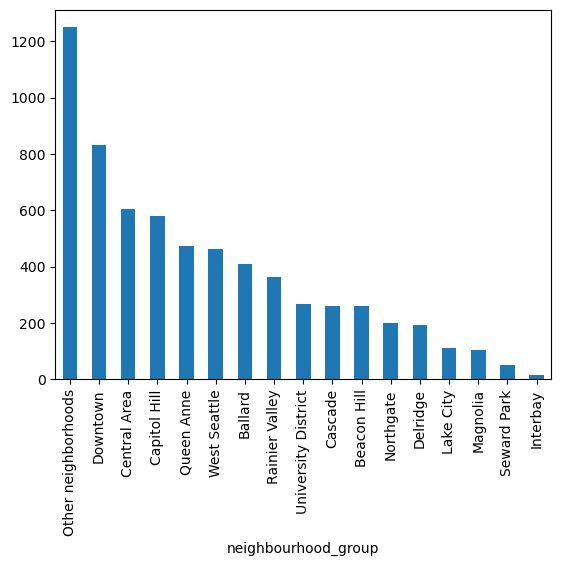

In [13]:
# neighbourhood_group and count  

df_lis.neighbourhood_group.value_counts().plot.bar()

In [14]:
df_nbr = df_lis.neighbourhood_group.value_counts().reset_index()

In [15]:
df_nbr.head()

,neighbourhood_group,count
0,Other neighborhoods,1249
1,Downtown,831
2,Central Area,605
3,Capitol Hill,581
4,Queen Anne,474


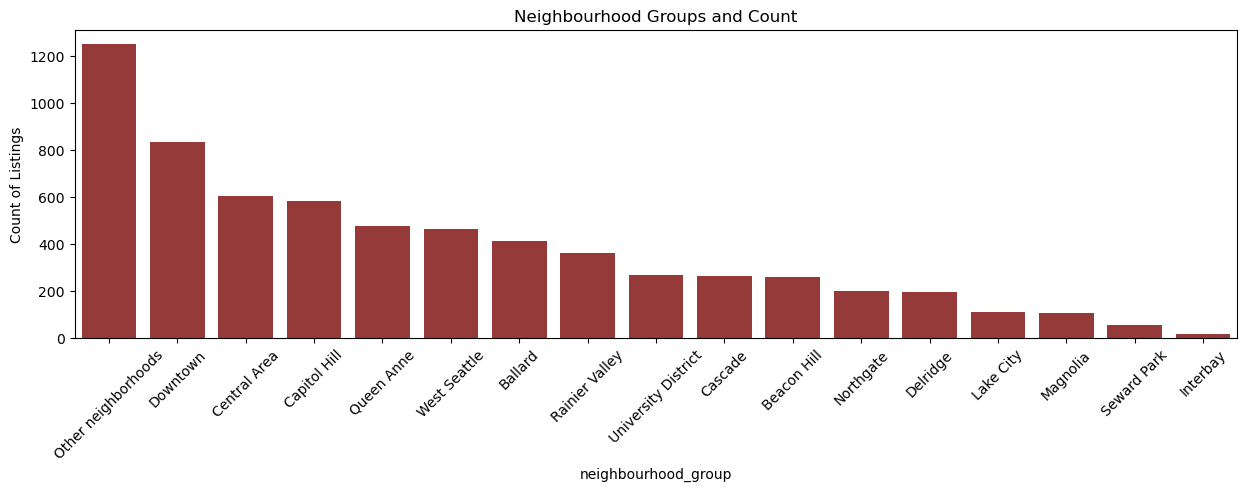

In [16]:
# neighbourhood_group wise count of listings
plt.figure(figsize=(15,4))
sns.barplot(data=df_nbr, x='neighbourhood_group', y='count', color='brown')
plt.title('Neighbourhood Groups and Count')
plt.ylabel('Count of Listings')
plt.xticks(rotation= 45)
plt.show()

In [17]:
df_lis.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt


In [18]:
neighbourhood_count =df_lis.groupby('neighbourhood')['id'].count().reset_index()
neighbourhood_count

,neighbourhood,id
0,Adams,126
1,Alki,117
2,Arbor Heights,24
3,Atlantic,131
4,Belltown,343
...,...,...
83,West Woodland,113
84,Westlake,18
85,Whittier Heights,70
86,Windermere,14


- There are total 88 neighbourhoods in Seattle

In [19]:
# neighbourhood_grou, neighbourhood wise listings count
df_lis.pivot_table(index= ['neighbourhood_group','neighbourhood'],  values= 'id',aggfunc='count').head()

id
neighbourhood_group neighbourhood        
Ballard             Adams             126
                    Loyal Heights      69
                    Sunset Hill        33
                    West Woodland     113
                    Whittier Heights   70

In [20]:
# neighbourhood_group wise average price

df_nei_price= df_lis.groupby('neighbourhood_group')['price'].agg(['mean']).reset_index()
df_nei_price= df_nei_price.sort_values(by='mean', ascending=False)
df_nei_price

,neighbourhood_group,mean
12,Queen Anne,259.382735
3,Cascade,237.919164
6,Downtown,237.824443
4,Central Area,232.693218
9,Magnolia,228.442717
11,Other neighborhoods,213.279070
0,Ballard,210.473975
2,Capitol Hill,204.479919
16,West Seattle,198.136652
1,Beacon Hill,194.551678


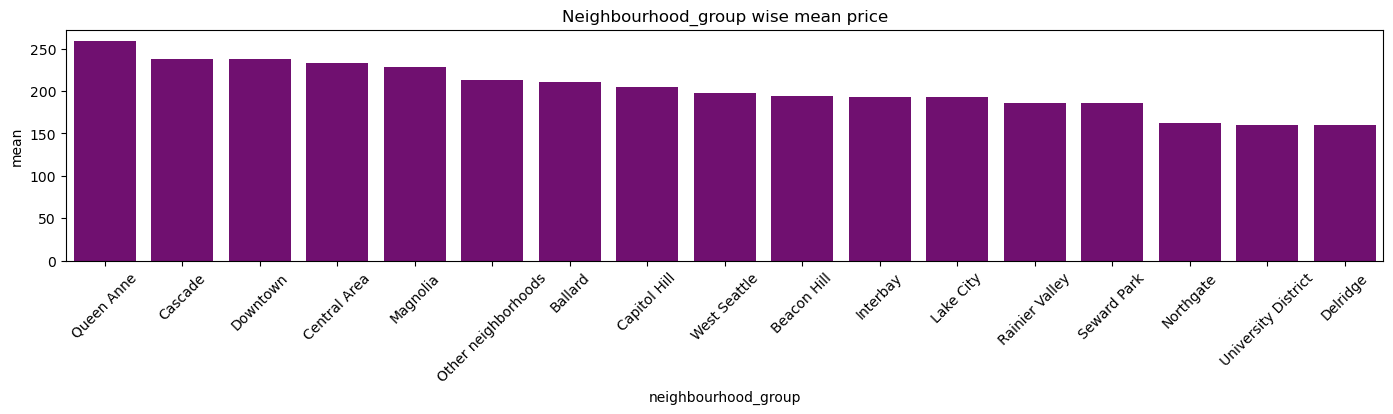

In [21]:
# neighbourhood_group wise average price
plt.figure(figsize= (17,3))
sns.barplot(data=df_nei_price, x='neighbourhood_group',  y='mean' , color='purple', )
plt.title ('Neighbourhood_group wise mean price')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Room Type Count

df_lis.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
room_type,,,,,,,,,,,,,,,,,
Entire home/apt,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,5387,4448
Hotel room,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Private room,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,837
Shared room,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6


In [23]:
# room_type_count
room_type_count = df_lis.room_type.value_counts().reset_index()
room_type_count

,room_type,count
0,Entire home/apt,5387
1,Private room,1024
2,Hotel room,21
3,Shared room,10


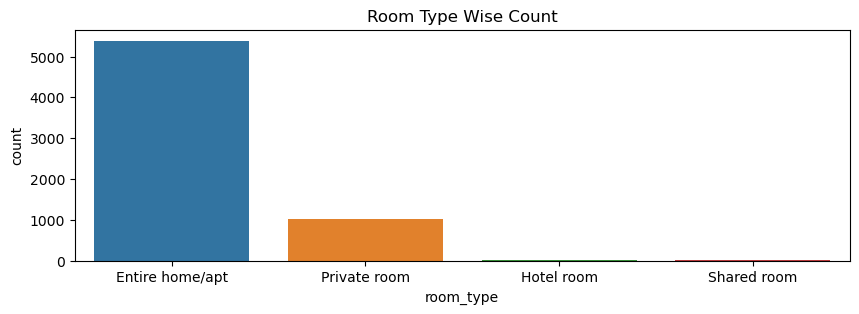

In [24]:
# Room Type Wise Count
plt.figure(figsize=(10,3))
sns.barplot(data=room_type_count, x='room_type', y= 'count')
plt.title('Room Type Wise Count')
plt.show()

In [25]:
# Room Type Wise Count and Avg. Price
room_mean_price = df_lis.groupby('room_type')['price'].mean().reset_index()
room_mean_price.columns = ['room_type', 'mean_price']
room_mean_price2= room_mean_price.sort_values(by= 'mean_price', ascending=False)
room_mean_price2

,room_type,mean_price
1,Hotel room,532.214052
0,Entire home/apt,230.259772
2,Private room,113.750488
3,Shared room,82.700000


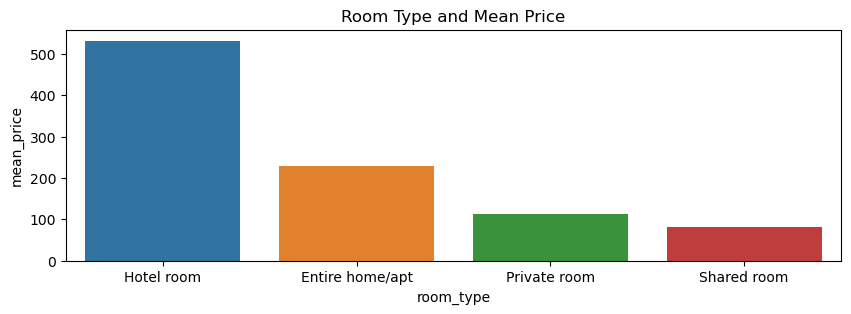

In [26]:
# Room Type Wise Count and Avg. Price
plt.figure(figsize=(10,3))
sns.barplot(data= room_mean_price2, x= 'room_type', y= 'mean_price')
plt.title('Room Type and Mean Price')
plt.show()

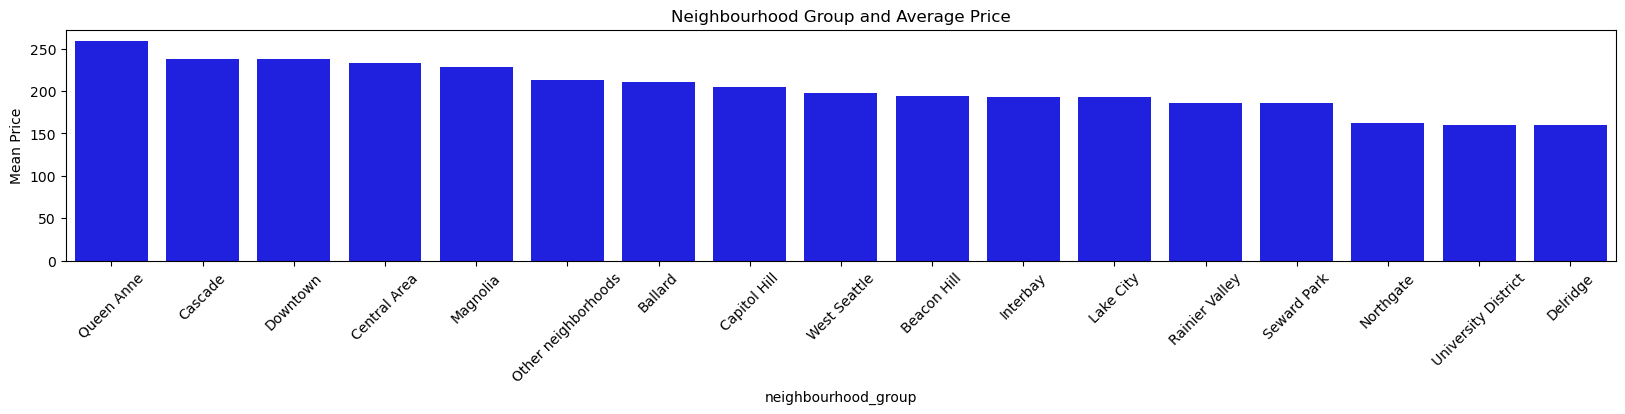

In [27]:
# neighbourhood_group and Average Price
df_lis.groupby('neighbourhood_group')['price'].agg(['mean'])
neighbourhood_gr_price2 = df_lis.groupby('neighbourhood_group')['price'].agg(['mean']).sort_values(by= 'mean', ascending=False )

# Plot
neighbourhood_group_price= df_lis.groupby('neighbourhood_group')['price'].agg(['mean']).sort_values(by= 'mean', ascending=False ).reset_index()
plt.figure(figsize=(20,3))
sns.barplot(data=neighbourhood_group_price, x= 'neighbourhood_group', y= 'mean', color='blue')
plt.xticks(rotation=45)
plt.ylabel('Mean Price')
plt.title('Neighbourhood Group and Average Price')
plt.show()


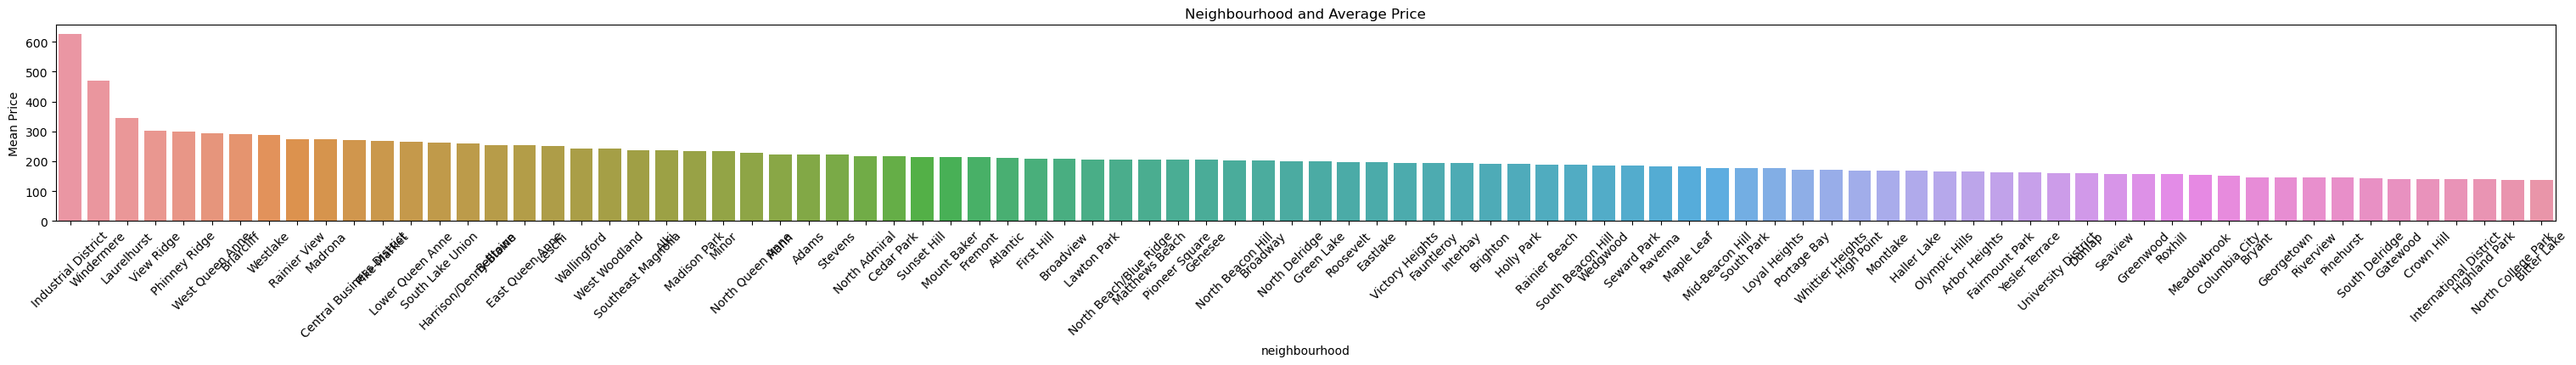

In [28]:
# Neighbourhood and Average Price
neighbourhood_price = df_lis.groupby('neighbourhood')['price'].agg(['mean']).sort_values(by= 'mean', ascending=False ).reset_index()
plt.figure(figsize=(38,3))
sns.barplot(data=neighbourhood_price, x= 'neighbourhood', y ='mean' )
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.title('Neighbourhood and Average Price')
plt.show()

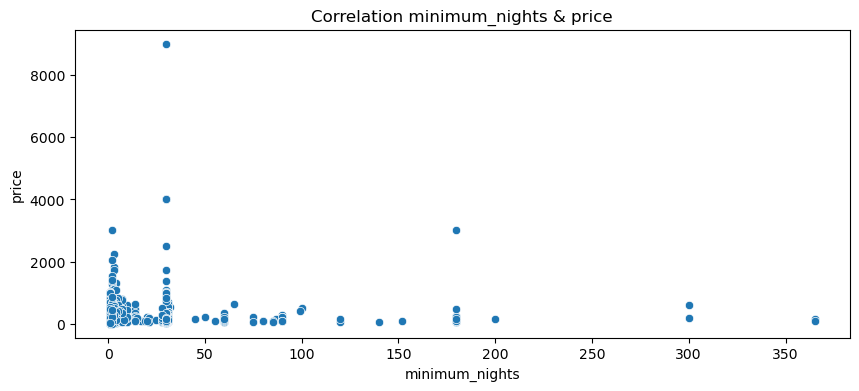

In [29]:
# Correlation minimum_nights & price
plt.figure(figsize=(10,4))
sns.scatterplot(data=df_lis, x= 'minimum_nights', y= 'price')
plt.title('Correlation minimum_nights & price')
plt.show()

In [30]:
df_lis.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.000000,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.000000,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.000000,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125.000000,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,212.495092,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622


In [31]:
#sns.pairplot(df_lis)

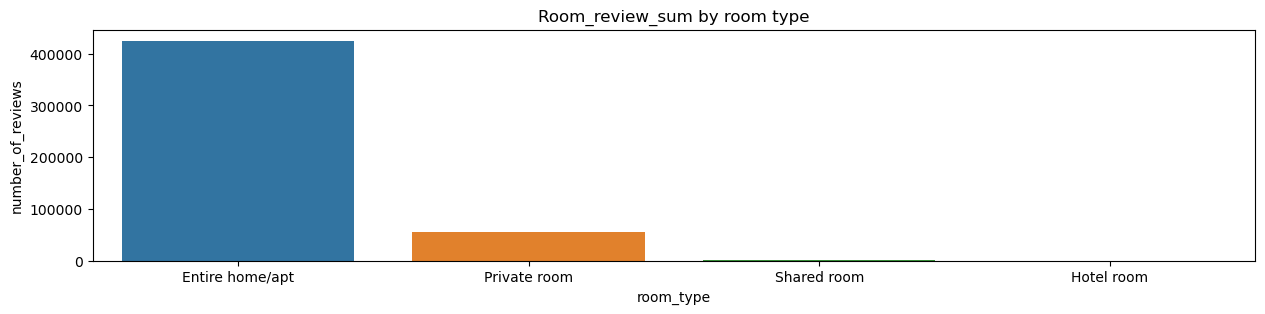

In [32]:
# room_review_sum by room type
room_review_sum = df_lis.groupby('room_type')['number_of_reviews'].sum().reset_index()
room_review_sum_sort = room_review_sum.sort_values(by = 'number_of_reviews', ascending= False)

plt.figure(figsize=(15,3))
sns.barplot(data=room_review_sum_sort, x='room_type', y='number_of_reviews')
plt.title('Room_review_sum by room type')
plt.show()

In [33]:
room_review_sum_sort

,room_type,number_of_reviews
0,Entire home/apt,425052
2,Private room,54988
3,Shared room,889
1,Hotel room,421


In [34]:
# Defination for room type and number of reviews

def plot_bar (df, x_in, y_in):
    sns.barplot(data= df, x= x_in, y= y_in)

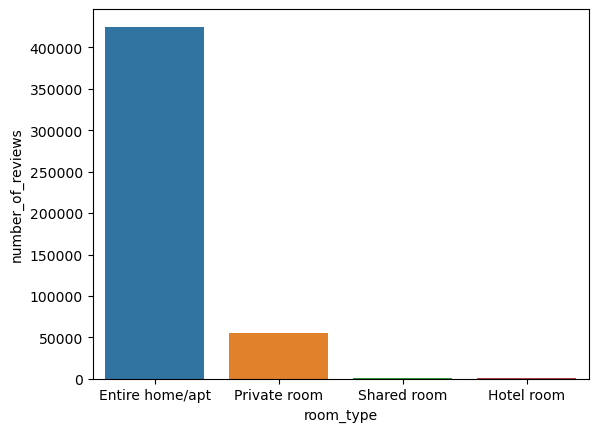

In [35]:
plot_bar (room_review_sum_sort, x_in='room_type' , y_in= 'number_of_reviews')